# Задание:

#### Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

<b>Описание задания:</b>
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта https://www.cs.toronto.edu/~delve/data/adult/desc.html.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

<b> Этапы работы:</b>
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
Преобразуйте категориальные признаки.
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

<b>Результат</b>: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.
Срок выполнения: 7 календарных дней


*Рекомендации к выполнению:
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [391]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [236]:
df = pd.read_csv('adult.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [237]:
# Исключим поле fnlwgt, т.к. оно не представляет интереса для анализа

df=df.drop('fnlwgt',axis=1)

# Подготовка данных

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [240]:
df.describe(include='object').T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [241]:
print(f'Датасет содержит {df.shape[0]} записей и {df.shape[1]} признаков')

Датасет содержит 48842 записей и 14 признаков


In [242]:
df.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [243]:
# Кол-во уникальных значений в категориальных признаках:

cat_col = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

for col in cat_col:
    print(f'{col}: {len(df[col].unique())}')

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
gender: 2
native-country: 42
income: 2


Как мы выяснили, пропусков в данных нет, проверим более детально значения признаков. Для этого напишем функцию, которая выведет уникальные значения в каждом поле

In [244]:

def unique_value_in_field(field):

    """
    Функция на вход принимает список полей датафрейма и выводит по ним список уникальных значений field: [value_1, value_2, ..., value_n]
    
    """ 
    print(col, ':', df[col].unique())

In [245]:
for i, col in enumerate(cat_col):
    print(f'{i+1})', end=' ')
    unique_value_in_field(col)
    print('--'*45)

1) workclass : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
------------------------------------------------------------------------------------------
2) education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
------------------------------------------------------------------------------------------
3) marital-status : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
------------------------------------------------------------------------------------------
4) occupation : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
--------------

# Обработка пропусков

В поле "workclass", "occupation ", "native-country" содержаться неопределенные значения в виде "?". Оценим объем таких записей

In [246]:
df.isin(['?']).sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [247]:
# Так как "?" это неопределенные данные, заменим их на пропуски

df.replace('?', np.nan, inplace=True)

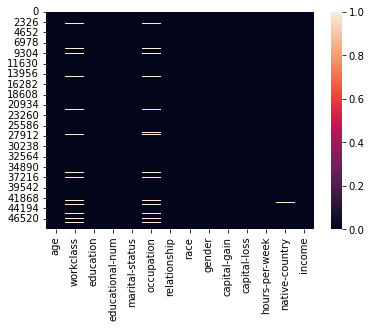

In [248]:
# Визуализирую пропуски в данных

sns.heatmap(df.isnull());

In [249]:
# Оценим долю пропущенных значений

df.isnull().sum() * 100 / df.shape[0]

age                0.000000
workclass          5.730724
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

Посмотрим распределение пропущенных значений и на основании этого примем решение, что делать с проусками.

#### Workclass

In [250]:
df.workclass.value_counts(dropna=False, normalize=True) * 100 

Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
NaN                  5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

С большим отрывом в 69.4% случаев лидирует категория "Private", в то время, как остальные категории менее 10% каждая. В данном случае целесообразно заменить пропущенные значения модой.


In [251]:
df.workclass.fillna(df.workclass.mode()[0], inplace=True)

#### Occupation         

In [252]:
df.occupation.value_counts(dropna=False, normalize=True) * 100 

Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
NaN                   5.751198
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: occupation, dtype: float64

Группы очень плотно распределены, в связи с этим заполнение модой может привести к тому, что мы допустим большой % ошибок в заполнении.
В данном случае я принял решение исключить пустые значения с учетом того, что nan значений не превышает 5.7%.

In [253]:
df.occupation.dropna(inplace=True)

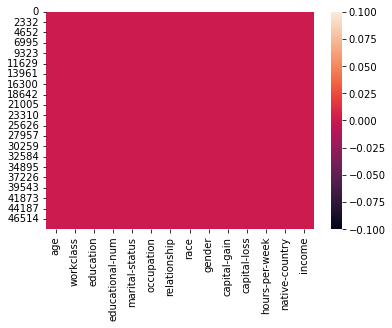

In [254]:
# Визуализируем отсутствие пропусков в данных

df.dropna(inplace=True)
sns.heatmap(df.isnull());


In [255]:
# Убедимся, что в датасете не осталось больше ни пропусков ни "?"
#  
df.isin(['?']).sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [256]:
df.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Удаление дубликатов

In [257]:
print(f'В данных встречаются дубликаты {df.duplicated().sum()} раз.')

В данных встречаются дубликаты 5982 раз.


In [258]:
df.drop_duplicates(inplace=True)

In [259]:
print('После удаления:', df.duplicated().sum())

После удаления: 0


# Поиск выбросов и анализ данных

In [260]:
# Сформируем список порядковых признаков, в которых мы будем искать выбросы.

num_features=[col for col in df.columns if df[col].dtype!='object']
num_features

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [261]:
num_data = df[num_features].head()
num_data

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


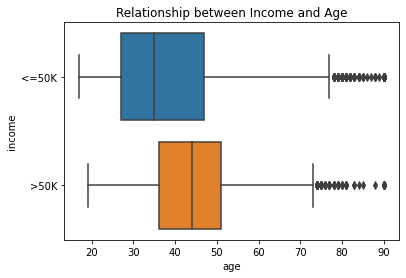

In [262]:
sns.boxplot(data=df, x='age', y='income')
plt.title('Relationship between Income and Age')
plt.show()

Из графика видно, что медианный возраст выше у категории людей, которая зарабатывает >50К, при этом аномалий в данных не видно.

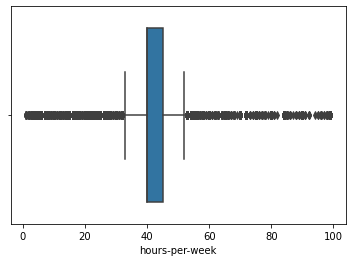

In [263]:
sns.boxplot(data=df, x='hours-per-week')

plt.show()

In [264]:
max_hours_per_week = df['hours-per-week'].max()
print(f'В неделе {24 * 7} часов, в то время, как максимальное время работы составляет: {max_hours_per_week} часов')
df[df['hours-per-week'] == max_hours_per_week]

В неделе 168 часов, в то время, как максимальное время работы составляет: 99 часов


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
384,29,Private,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1649,52,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
2078,33,State-gov,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47035,31,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
47047,42,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
47273,40,Self-emp-inc,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K


123 сотрудника испытывают аномальные переработки, при этом это вполне реальные данные и исключать из модели мы их не будем.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


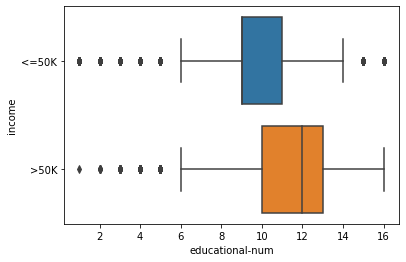

In [265]:
sns.boxplot(df['educational-num'], df.income );

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


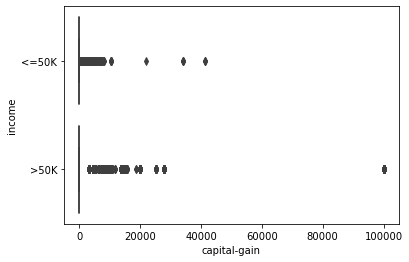

In [266]:
sns.boxplot(df['capital-gain'], df.income);

In [267]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036,  2050,  2961,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387], dtype=int64)

In [268]:
# Посмотрим на выброс в категории > 50K
df[df['capital-gain'] > 90000]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
346,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
702,43,State-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,22,Self-emp-not-inc,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
48109,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48519,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [269]:
df[df['capital-gain'] > 90000]['income'].unique()

array(['>50K'], dtype=object)

Данную категорию занимают очень обеспеченные люди, у которых доход превышает >50K. Исключать эти записи из модели не будем. Вероятней всего, в поле capital-gain стоит максимальный порог 99999, все записи превышающие данное значение получают эту метку.

In [272]:
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Построение визуализаций

In [297]:
# Оценим уровень дохода в разрезе пола и типа образования

eduction_data = df.groupby(['education', 'gender'])['income'].count().reset_index().sort_values('income', ascending=False)
eduction_data

# education_data = education_data.reset_index()

,education,gender,income
23,HS-grad,Male,7879
31,Some-college,Male,5291
19,Bachelors,Male,4471
22,HS-grad,Female,4124
30,Some-college,Female,3166
18,Bachelors,Female,2051
25,Masters,Male,1587
17,Assoc-voc,Male,1202
3,11th,Male,944
15,Assoc-acdm,Male,898


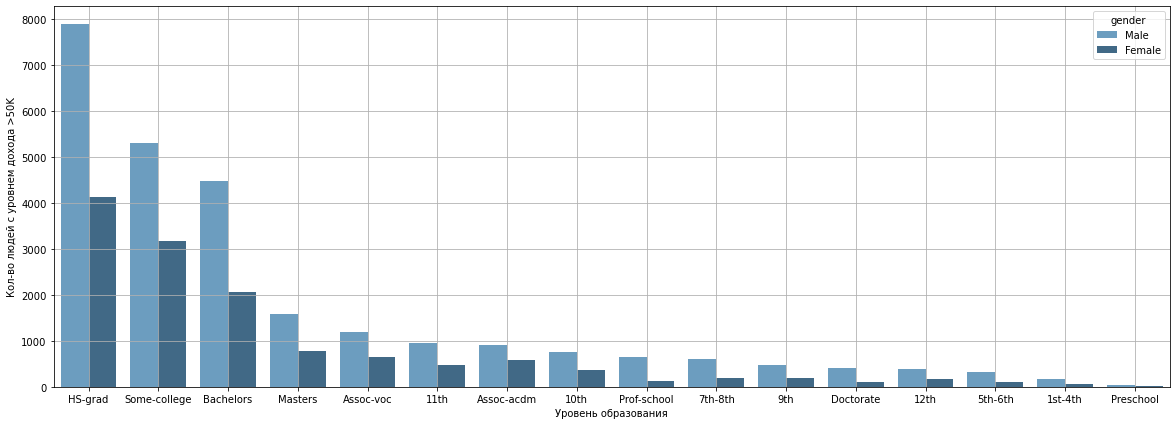

In [302]:
plt.figure(figsize=(20,7))
sns.barplot(data=eduction_data, x='education', y = 'income', hue='gender',   palette="Blues_d")
plt.xlabel("Уровень образования")
plt.ylabel("Кол-во людей с уровнем дохода >50K")
plt.grid()

Видим, что высокие зарплаты напрямую зависят от уровня образования. Мужчины зарабатывают в среднем больше, чем женщины.

In [345]:
gender_data = df.groupby(['gender','income'])[['income']].count()
gender_data.rename(columns={'income':'Total_Numbers'}, inplace=True)
gender_data.reset_index(inplace=True)

gender_data

,gender,income,Total_Numbers
0,Female,<=50K,11519
1,Female,>50K,1624
2,Male,<=50K,17746
3,Male,>50K,8351


In [349]:
less_50 = gender_data[gender_data['income'] == '<=50K']
less_50

,gender,income,Total_Numbers
0,Female,<=50K,11519
2,Male,<=50K,17746


In [350]:
over_50 = gender_data[gender_data['income'] == '>50K']
over_50

,gender,income,Total_Numbers
1,Female,>50K,1624
3,Male,>50K,8351


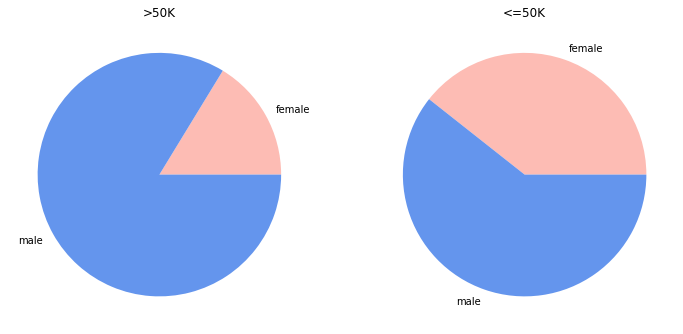

In [387]:
plt.figure(figsize = (12, 12))

plt.subplot(1, 2, 1)

mycolors = ['#fdbcb4', '#6495ed']

plt.pie(data=over_50, x='Total_Numbers', labels=['female', 'male'],  colors = mycolors);
plt.title(">50K");

plt.subplot(1, 2, 2)
plt.pie(data=less_50, x='Total_Numbers', labels=['female', 'male'],  colors = mycolors);
plt.title("<=50K")
plt.show()

Из данного графика можно сделать вывод, чем выше уровень дохода, тем меньше доля женщин.

# Кодирование таргет переменной

Таргет переменная - encoded_income

In [216]:
df.income.value_counts(dropna=False)

<=50K    29265
>50K      9975
Name: income, dtype: int64

In [217]:
def income_level(income):
    if income == '<=50K':
        return 0
    else:
        return 1

In [218]:
df['encoded_income'] = df['income'].apply(income_level)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [219]:
df.drop(columns='income', axis=1, inplace=True)

In [220]:
df.head(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,encoded_income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0


# Проверка линейной корреляции (r-Пирсона) признаков c таргет переменной

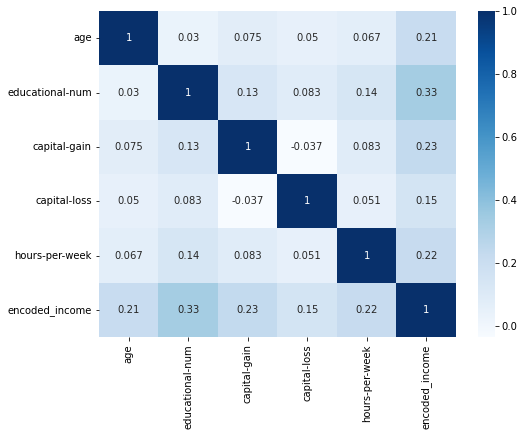

In [221]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

Видим, что все признаки вносят неплохой вклад в таргетную переменную "encoded_income". Максимальное значение корреляции с доходом у educational-num = 0.33 и самое низкое у capital-loss = 0.15

# Label encoding

In [222]:
le = LabelEncoder()

df.gender = le.fit_transform(df.gender)

In [223]:
df['gender'].value_counts()

1    26097
0    13143
Name: gender, dtype: int64

# One-hot encoding

In [224]:
# Ввыделим признаки и таргет в отдельные переменные

y = df['encoded_income']
X = df.drop(columns='encoded_income', axis=1)

In [225]:
# числовые признаки
num_features=[col for col in X.columns if X[col].dtype!='object']
num_features

['age',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [226]:
X = pd.get_dummies(X)

In [227]:
X.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,1,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Масштабирование данных

In [228]:
Scaler = StandardScaler()

X[num_features] = Scaler.fit_transform(X[num_features])

In [229]:
X.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.076054,-1.189268,0.709663,-0.156784,-0.234712,-0.096814,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.098454,-0.430876,0.709663,-0.156784,-0.234712,0.705892,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.850454,0.706711,0.709663,-0.156784,-0.234712,-0.096814,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.352746,-0.051680,0.709663,0.804950,-0.234712,-0.096814,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,-0.399254,-1.568463,0.709663,-0.156784,-0.234712,-0.899520,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Train test split

In [230]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1,test_size=0.2)

# LogisticRegression

In [231]:
lr = LogisticRegression()

In [232]:
lr.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
lr.score(X_test, y_test)

0.839704383282365

# Support Vector Classifier

In [392]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline( SVC(gamma='auto'))  # StandardScaler() так как я уже на матрице Х произвел скэйлинг, повторно его в пайплайн не добавляю.
                                         # Можно было создать обычную модель, но хочу попробовать новый подход :)
clf.fit(X_train, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [395]:
clf.score(X_test, y_test)

0.8456506965681277